# Explortary Data Analysis
# 探索性数据分析

1. 数据预处理:
    - 检查缺失值, 数据类型, 检查异常值 Outlier, 检查重复值, 结合业务理解
2. 数据可视化分析:
    - 变量 = 特征
    - 单变量分析: 看单一变量的数据分布, 尤其是 Churn 流失 (Target variable 目标变量), 其他数值型变量 (MonthlyCharges, TotalCharges, tenure), 以及类别型变量 (Contract, InternetService, PaymentMethod)
    - 双变量分析: 看各个attribute和churn的关系, 比如 Churn rate by service/demographics
    - 热力图 Heatmap: 看变量之间的关系

In [4]:
import pandas as pd

In [5]:
# DataFrame
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# 1. Data Preprocessing 数据预处理
- 检查缺失值: 如果有，删掉(如果缺失值很少的时候)，或者用 mean/mode/median 去替代，结合业务背景

In [7]:
# 数据级有多少行 多少列
df.shape

(7043, 21)

In [8]:
# 查看表头
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# 统计描述角度去看
# 描述性统计 Descriptive Statistics
# mean = 平均值 = 平均值是数据分布的中心位置
# standard deviation = 标准差 = 标准差是数据分布的离散程度
# variance = 方差 = 方差是标准差的平方，表示数据分布的离散程度
# min = 最小
# max = 最大值 
# range = max - min

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [11]:
# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [13]:
# 检查缺失值 Null/NA
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
# 我要看 TotalCharges 列中缺失值的行
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
df['TotalCharges'].fillna(0, inplace=True)

/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_19226/171940771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [16]:
# 我要看 TotalCharges 列中缺失值的行
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


## 2. Data Visualization 数据可视化

## 2.1 单一变量分析：
* Churn 流失 (Target variable 目标变量)
* 其他数值型变量 (MonthlyCharges, TotalCharges, tenure) 
* 类别型变量 (Contract, InternetService, PaymentMethod)

### Churn 流失变量分布

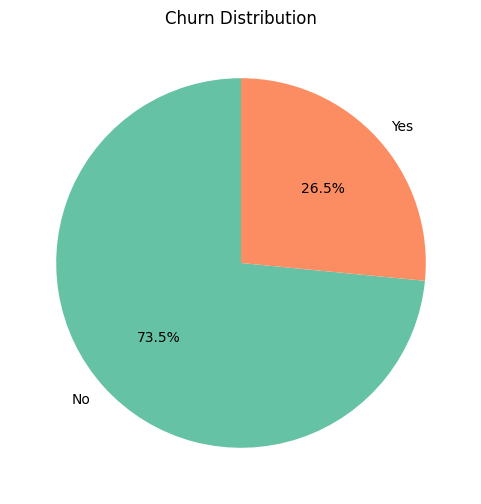

In [18]:
# 单变量分析: 看数据分布, 尤其是 Churn distribution
# Churn distribution

import matplotlib.pyplot as plt

# 统计 Churn 分布
churn_counts = df['Churn'].value_counts()

# 画饼图
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, 
        labels=churn_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#66c2a5', '#fc8d62'])  # 自定义颜色可选
plt.title('Churn Distribution')
plt.show()


## Insights:
* Yes的样本量偏小
* 主要目的：看类别分布，是否存在 class imbalance
* No ≈ 73%，Yes ≈ 27% → 中度不平衡
* 如果极度不平衡 (<10%):
    * Over sampling (过采样): 想办法让小的那个变量数据变多
    * Under sampling (欠采样): 想办法让多的那个变量数据变少
    * 换模型: 可以在样本不平衡的情况下表现好的模型, 比如 XGBoost

### 其他数值型变量分布 (MonthlyCharges, TotalCharges, tenure) 
- Univariate Analysis: Numeric features (tenure, MonthlyCharges, TotalCharges)
- 单变量分析: 数值特征 (tenure, MonthlyCharges, TotalCharges)
- 主要目的：看数值特征的分布形态
- 我们重点关注的属性：
    - 异常值
        - 箱线图里是否有极端 outliers？
        - 如果有，树模型（XGB/LGBM）没关系；但线性模型可能需要 winsorize / robust scaler
    - 偏度（skewness）
        - 如果分布严重右偏（如 TotalCharges），Logistic Regression 可以考虑 log 变换，增强线性可分性
        - log 变换的作用：
            - 通过压缩大值，把分布“拉近正态（Gaussian-like）”，让特征和目标的关系更接近线性
            - 例如：收入（Income）、总账单（TotalCharges）、销量这类天然右偏的数据，log 后通常更接近正态
            - 这样 Logistic Regression 学到的边界会更合理，不会被极端值左右
    - 峰度（kurtosis）
        - 高峰度 → 分布集中，长尾更极端；可能影响模型鲁棒性
    - 多峰
        - MonthlyCharges 明显是多峰的（不同套餐价格带）
        - 提示我们可能要 分箱（binning） 来增强解释性，比如低套餐 / 中套餐 / 高套餐 (特征工程)


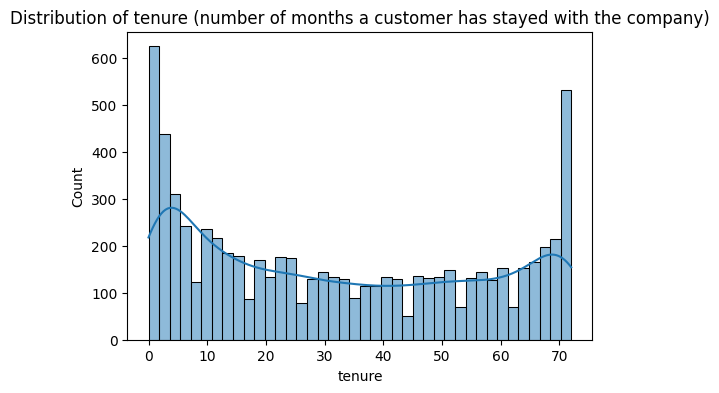

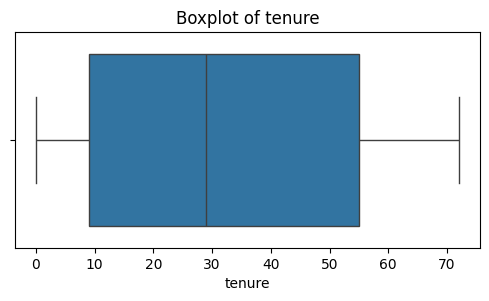

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 画直方图
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data=df, x='tenure', kde=True, bins=40)
plt.title('Distribution of tenure (number of months a customer has stayed with the company)')
plt.show()

# 箱线图检查极端值
fig, ax = plt.subplots(figsize=(6,2.8))
sns.boxplot(data=df, x='tenure')
plt.title('Boxplot of tenure')
plt.show()


### Business Insights (业务洞见):
* 分布呈现 **双峰**：

  * **新客户（0–1 月）** 占比非常大，说明公司有大量刚加入的客户。
  * **长期客户（70+ 月）** 也出现一个高峰，说明有忠诚用户群体。
  * **中间（10–60 月）** 分布相对平缓。
* **业务启示**：

  * 新客户 churn 风险高 → onboarding 和 early engagement 至关重要。
  * 长期客户 churn 风险低，迁移成本高 → 可以挖掘交叉销售和增值服务。

### Feature Insights (特征洞见):
* Tenure 分箱 / 新客户特征
   * 新客户群体 churn 风险与老客户不同。
   * 特征：
     * `tenure_bin` = 分三箱
     * `is_new_customer = tenure <= 6`

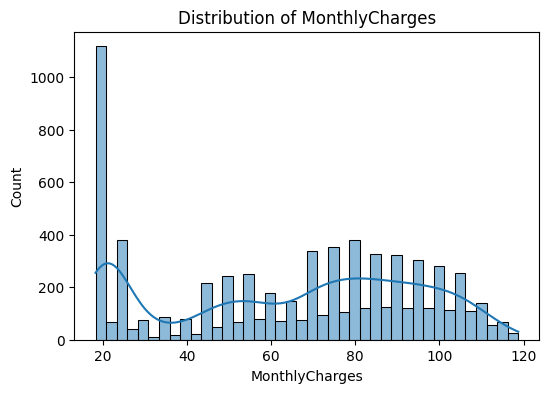

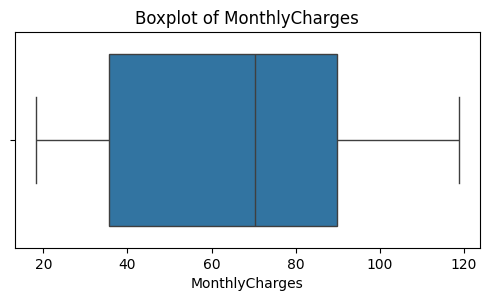

In [20]:
# 画直方图
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data=df, x='MonthlyCharges', kde=True, bins=40)
plt.title('Distribution of MonthlyCharges')
plt.show()

# 箱线图检查极端值
fig, ax = plt.subplots(figsize=(6,2.8))
sns.boxplot(data=df, x='MonthlyCharges')
plt.title('Boxplot of MonthlyCharges')
plt.show()

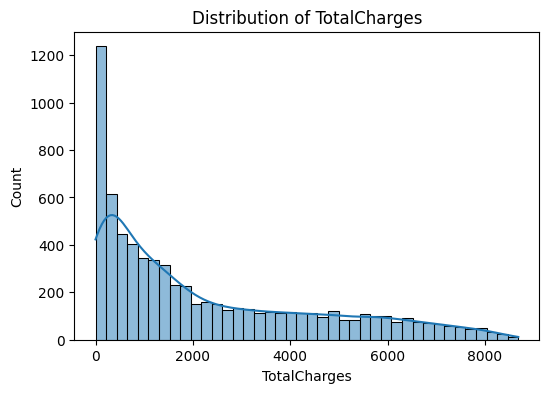

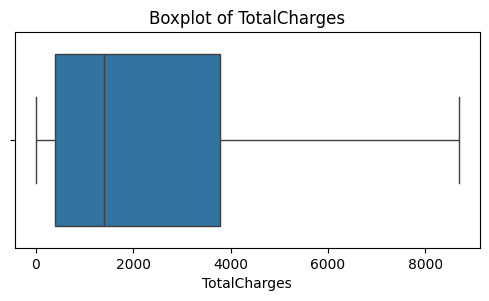

In [21]:
# 画直方图
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data=df, x='TotalCharges', kde=True, bins=40)
plt.title('Distribution of TotalCharges')
plt.show()

# 箱线图检查极端值
fig, ax = plt.subplots(figsize=(6,2.8))
sns.boxplot(data=df, x='TotalCharges')
plt.title('Boxplot of TotalCharges')
plt.show()

### Business Insights: 

* 分布呈现 **右偏长尾** (Positively Skewed, long tail)：

  * 大量用户的 TotalCharges 较低（新客户）。
  * 随 tenure 增加，TotalCharges 自然累积，最高能到 8000+。
* **业务启示**：

  * TotalCharges 实际上是 tenure × MonthlyCharges 的函数 → 高度共线。
  * 高 TotalCharges 用户 churn 风险低，但一旦流失，损失极大。
  * 新客户 TotalCharges=0， churn 风险最高。


### 测试: TotalCharges = tenure * MonthlyCharges?

In [22]:
# Test whether TotalCharges = tenure * MonthlyCharges
df['TotalCharges_check'] = df['tenure'] * df['MonthlyCharges']
df['TotalCharges_check'] = df['TotalCharges_check'].round(2)
df['TotalCharges_check'] = df['TotalCharges_check'].astype(float)
df['TotalCharges_check'].equals(df['TotalCharges'])

False

In [23]:
# Check if there are any discrepancies
discrepancies = df[df['TotalCharges_check'] != df['TotalCharges']]
discrepancies[['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalCharges_check']]

,tenure,MonthlyCharges,TotalCharges,TotalCharges_check
1,34,56.95,1889.50,1936.3
2,2,53.85,108.15,107.7
3,45,42.30,1840.75,1903.5
4,2,70.70,151.65,141.4
5,8,99.65,820.50,797.2
...,...,...,...,...
7038,24,84.80,1990.50,2035.2
7039,72,103.20,7362.90,7430.4
7040,11,29.60,346.45,325.6
7041,4,74.40,306.60,297.6


### 类别型变量 (Contract, InternetService, PaymentMethod)

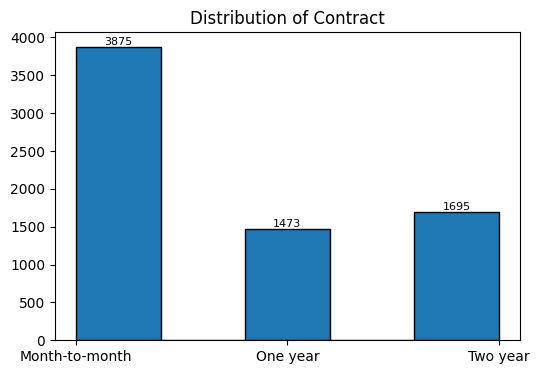

In [24]:
# 画直方图
fig, ax = plt.subplots(figsize=(6,4))
# 绘制直方图
counts, bins, patches = ax.hist(df['Contract'], bins=5, edgecolor='black')

# 在每个柱子上标数字
for rect, count in zip(patches, counts):
    height = rect.get_height()
    if height > 0:  # 只标非零的
        ax.text(rect.get_x() + rect.get_width()/2, height,
                int(height), ha='center', va='bottom', fontsize=8)

ax.set_title('Distribution of Contract')
plt.show()


## 2.2 双变量分析: 看各个attribute和churn的关系
- Churn rate by services 服务
    - 把人群按照渠道/服务类型分，来看churn流失率
    - InternetService, PaymentMethod, Contract
- Churn rate by demographics 人口统计
    - 双变量分析: 把人群按照类型(人口统计学)分，来看churn流失率
    - gender, SeniorCitizen, Partner, Dependents

In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalCharges_check'],
      dtype='object')

## Churn rate by services 服务
- 把人群按照渠道/服务类型分，来看churn流失率
- InternetService, PaymentMethod, Contract

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# 计算不同channel下的churn率
def churn_rate_by_group(df, group_col):
    churn_rate = (
        df.groupby(group_col)['Churn']
        .value_counts(normalize=True)
        .rename("percentage")
        .mul(100)
        .reset_index()  
    )
    churn_rate = churn_rate[churn_rate['Churn'] == "Yes"].drop(columns="Churn")
    return churn_rate.sort_values("percentage", ascending=False)

/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_19226/690407157.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


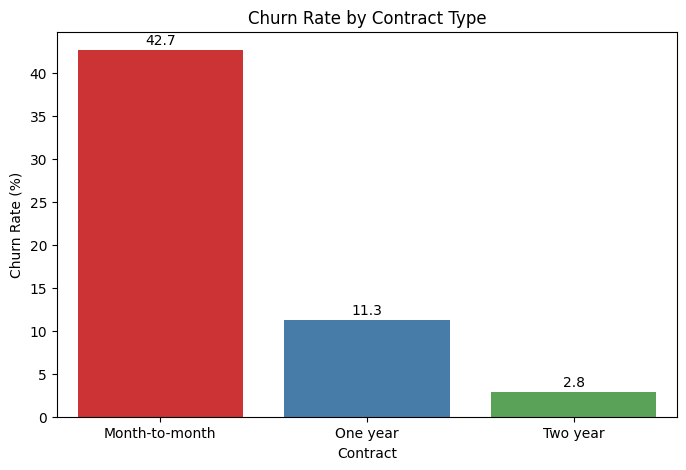

In [28]:
plt.figure(figsize=(8,5))

ax = sns.barplot(
    data = churn_rate_by_group(df, 'Contract'),
    x='Contract',
    y='percentage',
    palette='Set1'
)

plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")

# 在每个bar上加数值标签
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", padding=2)

plt.show()

### Insights:
- 长期合同能显著降低 churn
- Month-to-month 用户 churn 率远高于一年/两年合同 → 产品团队可以考虑用折扣、奖励来提升长期合约渗透率

/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_19226/3118778419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bx = sns.barplot(


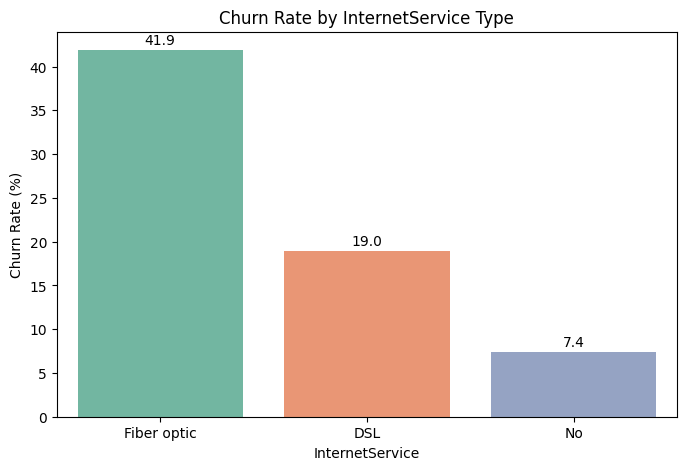

In [29]:
plt.figure(figsize=(8,5))
bx = sns.barplot(
    data = churn_rate_by_group(df, 'InternetService'),
    x='InternetService',
    y='percentage',
    palette='Set2'
)
plt.title("Churn Rate by InternetService Type")
plt.ylabel("Churn Rate (%)")

# 在每个bar上加数值标签
for container in bx.containers:
    bx.bar_label(container, fmt="%.1f", label_type="edge", padding=2)
    
plt.show()

### Insights:
- Fiber optic 用户：月费高、竞争对手多，容易因为价格/体验问题流失 → churn 高
- DSL 用户：月费中等，竞争压力小一些 → churn 中
- No 用户：只用电话/电视等小业务，月费低，流失动机不大，但并不是 0，因为他们还是可能彻底退掉所有服务

/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_19226/2172462059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cx = sns.barplot(


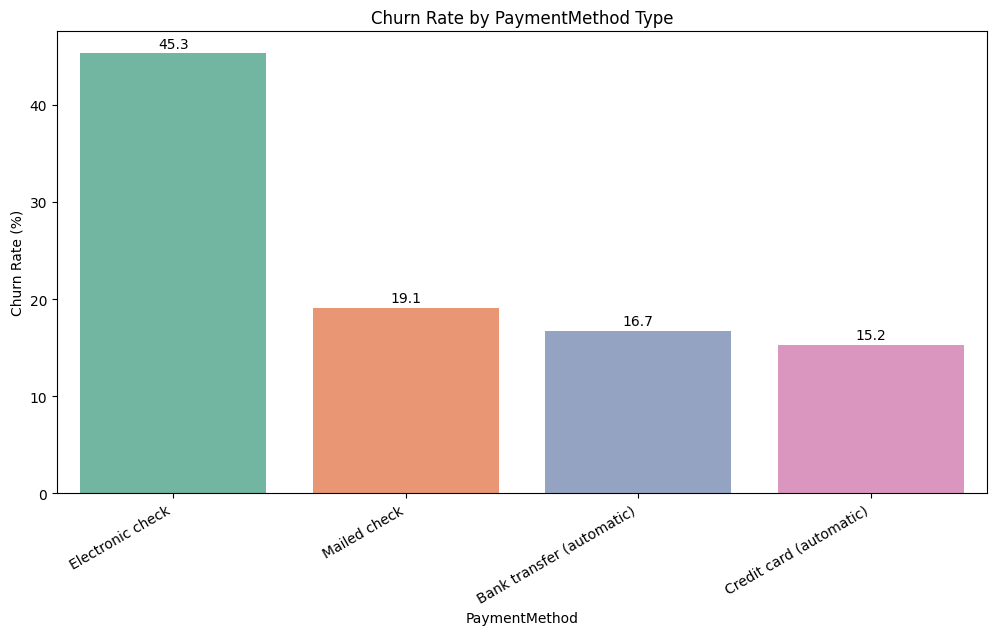

In [30]:
plt.figure(figsize=(12,6))
cx = sns.barplot(
    data = churn_rate_by_group(df, 'PaymentMethod'),
    x='PaymentMethod',
    y='percentage',
    palette='Set2'
)
plt.title("Churn Rate by PaymentMethod Type")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Churn Rate (%)")

# 在每个bar上加数值标签
for container in cx.containers:
    cx.bar_label(container, fmt="%.1f", label_type="edge", padding=2)

plt.show()

### Insights:
- 支付体验会影响 churn，可推广自动付款方式
- Electronic check 用户 churn 率最高 → 暗示支付体验差/流失风险高，可以考虑引导他们切换到自动转账

## Churn rate by demographics 人口统计
- 双变量分析: 把人群按照类型(人口统计学)分，来看churn流失率
- gender, SeniorCitizen, Partner, Dependents

/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_19226/221695314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cx = sns.barplot(


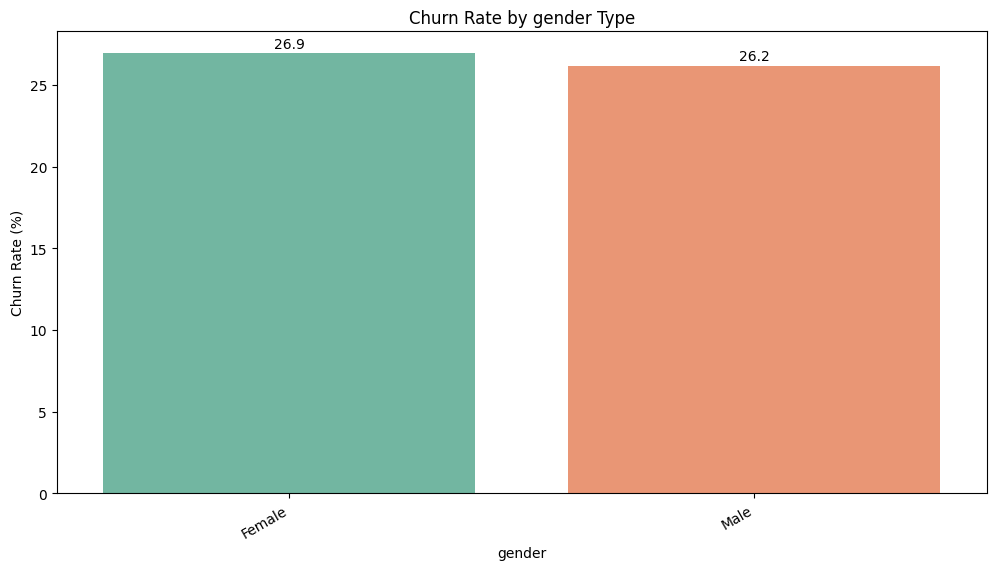

In [35]:
plt.figure(figsize=(12,6))
cx = sns.barplot(
    data = churn_rate_by_group(df, 'gender'),
    x='gender',
    y='percentage',
    palette='Set2'
)
plt.title("Churn Rate by gender Type")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Churn Rate (%)")

# 在每个bar上加数值标签
for container in cx.containers:
    cx.bar_label(container, fmt="%.1f", label_type="edge", padding=2)

plt.show()